## 데이터 불러오기 및 정제

In [117]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='Online Retail.xlsx')
retail_df = retail_df[retail_df['Country']=='United Kingdom']
retail_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [118]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


CustomerID 변수에 너무 많은 Null값 존재. Null값을 가진 데이터 제거 필요.

In [119]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [120]:
retail_df.dropna(inplace = True)

In [121]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [122]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


Quantity와 UnitPrice은 음수가 나올 수 없는 변수인데 최솟값이 음수. 음수를 가진 데이터 제거 필요.

In [123]:
idx = retail_df[retail_df['Quantity'] < 0] . index
retail_df.drop(idx, inplace = True)

In [124]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219
std,190.428127,17.862067,1594.546025
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


## Recency, Frequency, Monetary 열 만들기

In [125]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [126]:
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)

# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()

In [127]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print(cust_df.shape)
cust_df.head(5)

(3921, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,3,103,4196.01
2,12748.0,1,4596,33719.73
3,12749.0,4,199,4090.88
4,12820.0,4,59,942.34


## 데이터 변형

C:\Users\kimkw\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CustomerID', ylabel='Density'>

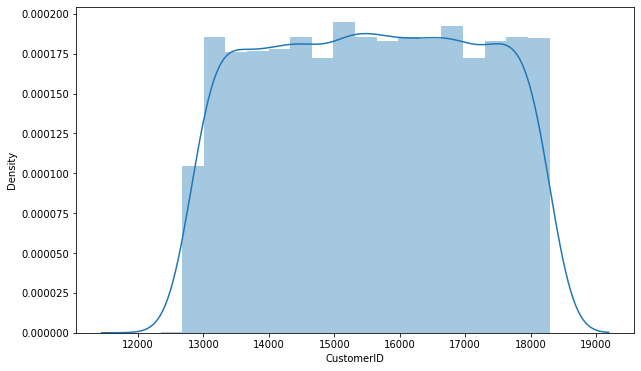

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10 , 6))
sns.distplot(cust_df['CustomerID'])

C:\Users\kimkw\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

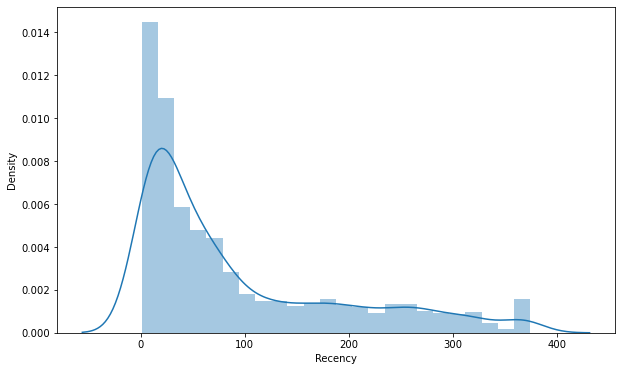

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10 , 6))
sns.distplot(cust_df['Recency'])

C:\Users\kimkw\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

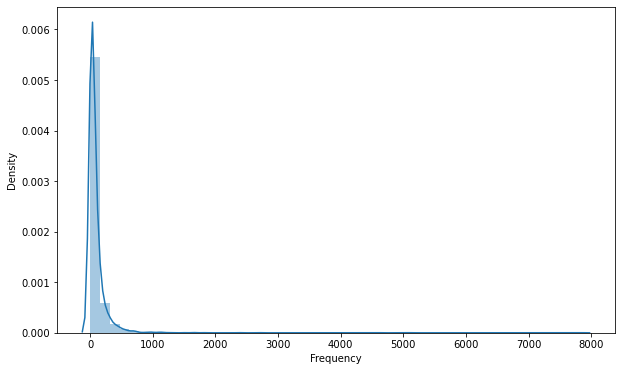

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10 , 6))
sns.distplot(cust_df['Frequency']) # 변형 필요

C:\Users\kimkw\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

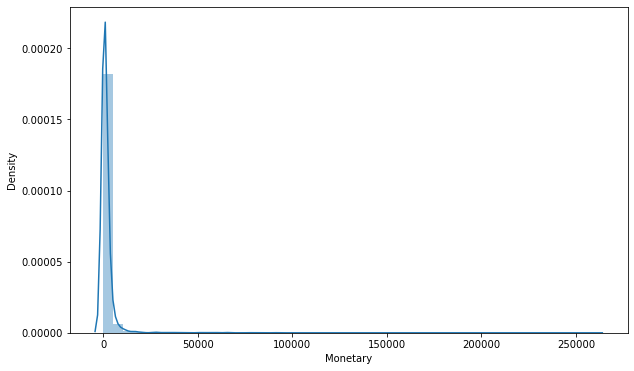

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10 , 6))
sns.distplot(cust_df['Monetary'])

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Freq = scaler.fit_transform(pd.DataFrame(cust_df['Frequency']))

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Mon = scaler.fit_transform(pd.DataFrame(cust_df['Monetary']))

In [134]:
cust_df ['Frequency'] = scaled_Freq

In [135]:
cust_df['Monetary'] = scaled_Mon

In [136]:
cust_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,-0.410395,10.068174
1,12747.0,3,0.057992,0.311738
2,12748.0,1,20.690005,4.258248
3,12749.0,4,0.498828,0.297685
4,12820.0,4,-0.144057,-0.123189
...,...,...,...,...
3916,18280.0,278,-0.369067,-0.225012
3917,18281.0,181,-0.382843,-0.238350
3918,18282.0,8,-0.359883,-0.225353
3919,18283.0,4,3.056591,0.030874


C:\Users\kimkw\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

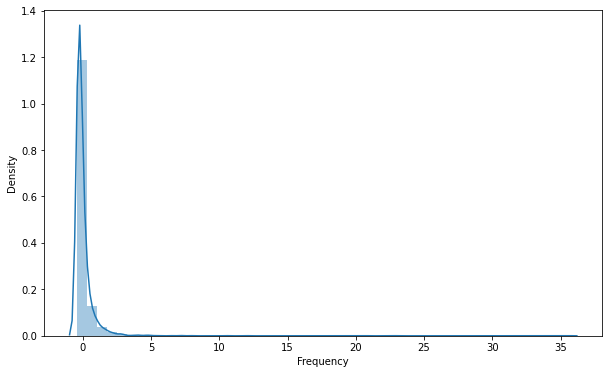

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10 , 6))
sns.distplot(cust_df['Frequency'])

C:\Users\kimkw\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

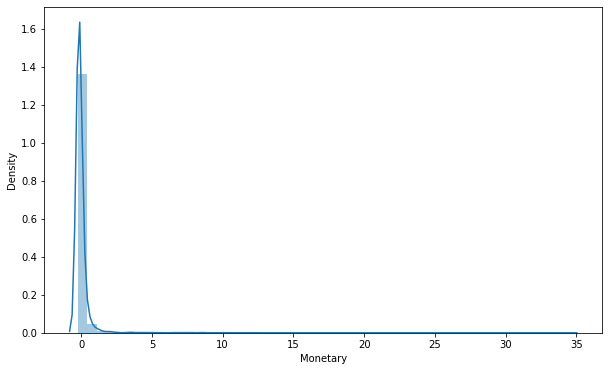

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10 , 6))
sns.distplot(cust_df['Monetary'])

## 실루엣 계수로 가장 적절한 군집 개수 구하기

In [139]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(cust_df)

print(kmeans.labels_)
cust_df['cluster'] = kmeans.labels_

[1 1 1 ... 2 2 2]


In [140]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster.iloc[:, 0].values, y=label_cluster.iloc[:, 1].values, s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

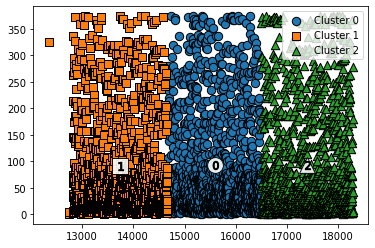

In [141]:
visualize_cluster_plot(kmeans, cust_df, 'cluster', iscenter=True)

In [142]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

def silhouette_clst(n):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300,random_state=0).fit(cust_df.iloc[:,:4])
    cust_df['cluster']=kmeans.labels_
    score_samples = silhouette_samples(cust_df, cust_df['cluster'])
    cust_df['silhouette_coeff'] = score_samples
    average_score = silhouette_score(cust_df, cust_df['cluster'])
    print('데이터셋 평균 실루엣 계수:{0:.3f}'.format(average_score))
    print(cust_df.groupby('cluster')['silhouette_coeff'].mean())
    
    y_lower=10
    for i in range(n):
        ith_cluster_sil_values = cust_df.loc[cust_df['cluster']==i]['silhouette_coeff'].values
        ith_cluster_sil_values.sort()
        
        size_cluster_i = ith_cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster_i
            
        color = cm.nipy_spectral(float(i) / n)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                        facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
            
    plt.axvline(x=average_score, color="red", linestyle="--")
    plt.show()
    

데이터셋 평균 실루엣 계수:0.616
cluster
0    0.618072
1    0.613792
Name: silhouette_coeff, dtype: float64


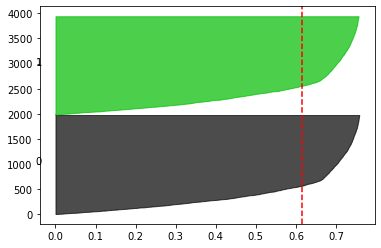

In [143]:
silhouette_clst(2)

데이터셋 평균 실루엣 계수:0.576
cluster
0    0.506816
1    0.608666
2    0.614101
Name: silhouette_coeff, dtype: float64


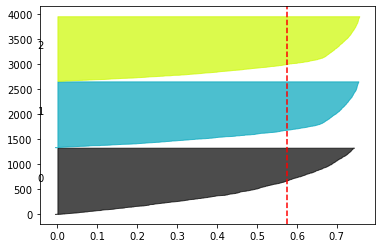

In [144]:
silhouette_clst(3)

데이터셋 평균 실루엣 계수:0.549
cluster
0    0.490346
1    0.607212
2    0.608337
3    0.492233
Name: silhouette_coeff, dtype: float64


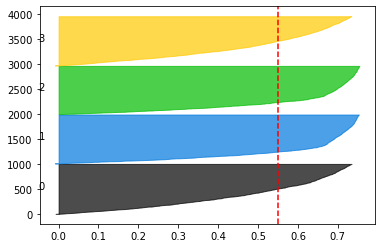

In [145]:
silhouette_clst(4)

In [ ]:
# 2일때가 가장 적절하다

# 은아야 오늘 만나서 반가웠어 ㅎㅎㅎㅎ 교환 잘 다녀오고! 기회되면 돌아와서 한번 보자 ><
# 한학기 동안 수고많았고 고마웠어!!